In [1]:
from scipy.spatial import distance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import skcriteria as skc

In [47]:
path ='https://docs.google.com/spreadsheets/d/e/2PACX-1vTtHjjS_APA5AHQ2Thyqh4wLFcJ3mRLfVE6AAlfVRsj_vM57zy_15CY8obEusl8yqtZLUSX4e2kyxnf/pub?gid=1628230296&single=true&output=csv'
df = pd.read_csv(path)

In [48]:
df

,Destination,Passengers,Rate,Month,Year,Continent,weather,City,Ski,Casino,Beach,Length
0,AMMAN (MARKA),217,0.02,1,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AMSTERDAM,17956,2.08,1,2015,Europe,Cold,1.0,0.0,1.0,1.0,5.00
2,ANCONA,148,0.01,1,2015,Europe,Cold,1.0,NaN,NaN,NaN,NaN
3,BAKU HEYDAR ALIYEV INT`L,948,0.11,1,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BARCELONA,18006,2.09,1,2015,Europe,Cold,1.0,0.0,1.0,1.0,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...
15458,ZURICH,28628,2.82,12,2015,Europe,Cold,1.0,1.0,1.0,0.0,4.15
15459,ZURICH,32784,2.79,12,2016,Europe,Cold,1.0,1.0,1.0,0.0,4.15
15460,ZURICH,32550,2.32,12,2017,Europe,Cold,1.0,1.0,1.0,0.0,4.15
15461,ZURICH,31521,2.04,12,2018,Europe,Cold,1.0,1.0,1.0,0.0,4.15


In [49]:
value_list = ['MOSCOW','ZURICH','BARCELONA','NEW YORK','AMSTERDAM','BUDAPEST','VIENNA','ANTALYA','MADRID','FRANKFURT']
df = df[df['Destination'].isin(value_list)]

In [50]:
df_destinations=df[['Destination']]
df_destinations=df_destinations.drop_duplicates(subset=['Destination'])
j=0
altdestinations=[]
for i in df_destinations.iterrows():
    altdestinations.append(df_destinations.iloc[j]['Destination'])
    j=j+1

In [51]:
df = df.drop_duplicates(subset=['Destination'])
df

,Destination,Passengers,Rate,Month,Year,Continent,weather,City,Ski,Casino,Beach,Length
1878,AMSTERDAM,34455,3.15,6,2011,Europe,Hot,1.0,0.0,1.0,0.0,2.45
2056,ANTALYA,20463,3.10,1,2008‬‏,Europe,Cold,1.0,0.0,0.0,1.0,1.30
2653,BARCELONA,37676,3.44,6,2011,Europe,Hot,1.0,0.0,1.0,0.0,2.45
4203,BUDAPEST,18394,2.27,5,2007‬‏,Europe,Cold,1.0,0.0,1.0,0.0,2.45
5920,FRANKFURT,32127,5.50,1,2007‬‏,Europe,Cold,1.0,1.0,1.0,0.0,4.30
9198,MADRID,30137,3.13,5,2008‬‏,Europe,Cold,1.0,0.0,1.0,0.0,2.45
10767,NEW YORK,45979,5.34,1,2015,America,Cold,1.0,0.0,1.0,1.0,11.30
14395,VIENNA,30585,2.99,5,2012,Europe,Cold,1.0,0.0,1.0,0.0,2.45
15306,ZURICH,26691,4.56,1,2007‬‏,Europe,Cold,1.0,1.0,1.0,0.0,4.15


In [52]:
df.drop(columns=['Rate','Passengers','Year','Destination','Length','Month'],inplace=True)

In [53]:
df

,Continent,weather,City,Ski,Casino,Beach
1878,Europe,Hot,1.0,0.0,1.0,0.0
2056,Europe,Cold,1.0,0.0,0.0,1.0
2653,Europe,Hot,1.0,0.0,1.0,0.0
4203,Europe,Cold,1.0,0.0,1.0,0.0
5920,Europe,Cold,1.0,1.0,1.0,0.0
9198,Europe,Cold,1.0,0.0,1.0,0.0
10767,America,Cold,1.0,0.0,1.0,1.0
14395,Europe,Cold,1.0,0.0,1.0,0.0
15306,Europe,Cold,1.0,1.0,1.0,0.0


In [54]:
df = pd.get_dummies(df)
df

,City,Ski,Casino,Beach,Continent_America,Continent_Europe,weather_Cold,weather_Hot
1878,1.0,0.0,1.0,0.0,0,1,0,1
2056,1.0,0.0,0.0,1.0,0,1,1,0
2653,1.0,0.0,1.0,0.0,0,1,0,1
4203,1.0,0.0,1.0,0.0,0,1,1,0
5920,1.0,1.0,1.0,0.0,0,1,1,0
9198,1.0,0.0,1.0,0.0,0,1,1,0
10767,1.0,0.0,1.0,1.0,1,0,1,0
14395,1.0,0.0,1.0,0.0,0,1,1,0
15306,1.0,1.0,1.0,0.0,0,1,1,0


In [55]:
Row_list =[]
  
# Iterate over each row
for index, rows in df.iterrows():
    # Create list for the current row
    my_list =[int(rows.City),int(rows.Ski),int(rows.Casino),int(rows.Beach),int(rows.Continent_America),int(rows.Continent_Europe),int(rows.weather_Cold),int(rows.weather_Hot)]
      
    # append the list to the final list
    Row_list.append(my_list)
  # Print the list
print(Row_list)

[[1, 0, 1, 0, 0, 1, 0, 1], [1, 0, 0, 1, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 1, 1, 0], [1, 1, 1, 0, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1, 1, 0], [1, 0, 1, 1, 1, 0, 1, 0], [1, 0, 1, 0, 0, 1, 1, 0], [1, 1, 1, 0, 0, 1, 1, 0]]


In [56]:
# we use the built-in function as aliases
dm = skc.mkdm(Row_list, [max, max, max,max, max, max,max, max])
dm


C0[▲ 1.0] C1[▲ 1.0] C2[▲ 1.0] C3[▲ 1.0] C4[▲ 1.0] C5[▲ 1.0] C6[▲ 1.0]  \
A0         1         0         1         0         0         1         0   
A1         1         0         0         1         0         1         1   
A2         1         0         1         0         0         1         0   
A3         1         0         1         0         0         1         1   
A4         1         1         1         0         0         1         1   
A5         1         0         1         0         0         1         1   
A6         1         0         1         1         1         0         1   
A7         1         0         1         0         0         1         1   
A8         1         1         1         0         0         1         1   

   C7[▲ 1.0]  
A0         1  
A1         0  
A2         1  
A3         0  
A4         0  
A5         0  
A6         0  
A7         0  
A8         0  
[9 Alternatives x 8 Criteria]

In [57]:
objectives=[max, max, max,max, max, max,max, max]

In [59]:
dm = skc.mkdm(
    Row_list,
    objectives,
    alternatives=altdestinations,
    criteria=["City", "Ski", "Casino","Beach","Continent_America","Continent_Europe","weather_Cold","weather_Hot"],
)
dm

City[▲ 1.0] Ski[▲ 1.0] Casino[▲ 1.0] Beach[▲ 1.0]  \
AMSTERDAM           1          0             1            0   
ANTALYA             1          0             0            1   
BARCELONA           1          0             1            0   
BUDAPEST            1          0             1            0   
FRANKFURT           1          1             1            0   
MADRID              1          0             1            0   
NEW YORK            1          0             1            1   
VIENNA              1          0             1            0   
ZURICH              1          1             1            0   

          Continent_America[▲ 1.0] Continent_Europe[▲ 1.0]  \
AMSTERDAM                        0                       1   
ANTALYA                          0                       1   
BARCELONA                        0                       1   
BUDAPEST                         0                       1   
FRANKFURT                        0                       1   
MADRID                           0                       1   
NEW YORK                         1                       0   
VIENNA                           0                       1   
ZURICH                           0                       1   

          weather_Cold[▲ 1.0] weather_Hot[▲ 1.0]  
AMSTERDAM                   0                  1  
ANTALYA                     1                  0  
BARCELONA                   0                  1  
BUDAPEST                    1                  0  
FRANKFURT                   1                  0  
MADRID                      1                  0  
NEW YORK                    1                  0  
VIENNA                      1                  0  
ZURICH                      1                  0  
[9 Alternatives x 8 Criteria]

In [61]:
dm = skc.mkdm(
    Row_list,
    objectives,
    weights=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125],
    alternatives=altdestinations,
    criteria=["City", "Ski", "Casino","Beach","Continent_America","Continent_Europe","weather_Cold","weather_Hot"],
)
dm

City[▲ 0.125] Ski[▲ 0.125] Casino[▲ 0.125] Beach[▲ 0.125]  \
AMSTERDAM             1            0               1              0   
ANTALYA               1            0               0              1   
BARCELONA             1            0               1              0   
BUDAPEST              1            0               1              0   
FRANKFURT             1            1               1              0   
MADRID                1            0               1              0   
NEW YORK              1            0               1              1   
VIENNA                1            0               1              0   
ZURICH                1            1               1              0   

          Continent_America[▲ 0.125] Continent_Europe[▲ 0.125]  \
AMSTERDAM                          0                         1   
ANTALYA                            0                         1   
BARCELONA                          0                         1   
BUDAPEST                           0                         1   
FRANKFURT                          0                         1   
MADRID                             0                         1   
NEW YORK                           1                         0   
VIENNA                             0                         1   
ZURICH                             0                         1   

          weather_Cold[▲ 0.125] weather_Hot[▲ 0.125]  
AMSTERDAM                     0                    1  
ANTALYA                       1                    0  
BARCELONA                     0                    1  
BUDAPEST                      1                    0  
FRANKFURT                     1                    0  
MADRID                        1                    0  
NEW YORK                      1                    0  
VIENNA                        1                    0  
ZURICH                        1                    0  
[9 Alternatives x 8 Criteria]

<AxesSubplot:xlabel='Criteria', ylabel='Alternatives'>

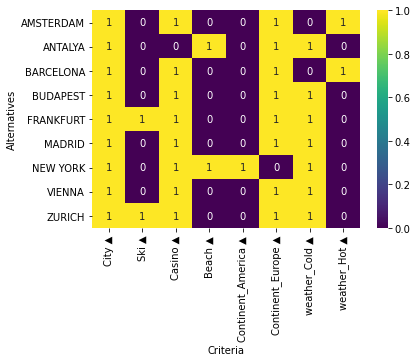

In [62]:
dm.plot()

C:\Users\Tom seleck\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

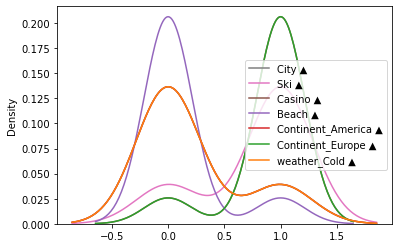

In [64]:
dm.plot("kde")

In [65]:
from skcriteria.preprocessing import invert_objectives, scalers

In [66]:
inverter = invert_objectives.InvertMinimize()
dmt = inverter.transform(dm)
dmt

City[▲ 0.125] Ski[▲ 0.125] Casino[▲ 0.125] Beach[▲ 0.125]  \
AMSTERDAM             1            0               1              0   
ANTALYA               1            0               0              1   
BARCELONA             1            0               1              0   
BUDAPEST              1            0               1              0   
FRANKFURT             1            1               1              0   
MADRID                1            0               1              0   
NEW YORK              1            0               1              1   
VIENNA                1            0               1              0   
ZURICH                1            1               1              0   

          Continent_America[▲ 0.125] Continent_Europe[▲ 0.125]  \
AMSTERDAM                          0                         1   
ANTALYA                            0                         1   
BARCELONA                          0                         1   
BUDAPEST                           0                         1   
FRANKFURT                          0                         1   
MADRID                             0                         1   
NEW YORK                           1                         0   
VIENNA                             0                         1   
ZURICH                             0                         1   

          weather_Cold[▲ 0.125] weather_Hot[▲ 0.125]  
AMSTERDAM                     0                    1  
ANTALYA                       1                    0  
BARCELONA                     0                    1  
BUDAPEST                      1                    0  
FRANKFURT                     1                    0  
MADRID                        1                    0  
NEW YORK                      1                    0  
VIENNA                        1                    0  
ZURICH                        1                    0  
[9 Alternatives x 8 Criteria]

In [67]:
from skcriteria.madm import simple
dec = simple.WeightedSumModel()
rank = dec.evaluate(dmt)  # we use the tansformed version of the data
rank

,AMSTERDAM,ANTALYA,BARCELONA,BUDAPEST,FRANKFURT,MADRID,NEW YORK,VIENNA,ZURICH
Rank,2,2,2,2,1,2,1,2,1


In [68]:
ranklist=list(rank.rank_)
ranklist

[2, 2, 2, 2, 1, 2, 1, 2, 1]

In [22]:
rank.e_.score

array([0.5  , 0.5  , 0.5  , 0.5  , 0.625, 0.5  , 0.625, 0.5  , 0.625])

In [ ]:
######real

In [23]:
mcdm=df
count=0
weather=input('Weather: ')
mcdm= mcdm[mcdm['weather']==weather]
city =input('City: ')
if city == 'yes':
    count=count+1
ski=input('Ski: ')
if ski == 'yes':
    count=count+1
casino=input('Casino: ')
if casino == 'yes':
    count=count+1
beach=input('Beach: ')
if beach == 'yes':
    count=count+1
continent=input('Continent: ')
mcdm= mcdm[mcdm['Continent']==continent]
length=float(input('Length: '))
mcdm= mcdm[mcdm['Length']<=length]
percent=1/count
if city == 'yes':
    perccity= percent
else:perccity=0
if ski == 'yes':
    percski= percent
else:percski=0
if casino == 'yes':
    percasino= percent
else:percasino=0
if beach == 'yes':
    percbeach= percent
else:percbeach=0

value_list = ['MOSCOW','ZURICH','BARCELONA','NEW YORK','AMSTERDAM','BUDAPEST','VIENNA','ANTALYA','MADRID','FRANKFURT','BUCHAREST','ISTANBUL','KIEV','PARIS','ROME','BERLIN','LONDON','MUNICH','PRAGUE']
mcdm = mcdm[mcdm['Destination'].isin(value_list)]
mcdm_destinations=mcdm[['Destination']]
mcdm_destinations=mcdm_destinations.drop_duplicates(subset=['Destination'])
mcdm = mcdm.drop_duplicates(subset=['Destination'])
mcdm.drop(columns=['Rate','Passengers','Year','Destination','Length','Month','Continent','weather'],inplace=True)
mcdm = pd.get_dummies(mcdm)
Row_list =[]

# Iterate over each row
for index, rows in mcdm.iterrows():
    # Create list for the current row
    my_list =[int(rows.City),int(rows.Ski),int(rows.Casino),int(rows.Beach)]
      
    # append the list to the final list
    Row_list.append(my_list)

    # we use the built-in function as aliases
dm = skc.mkdm(Row_list, [max, max, min,min])
objectives=[max, max, min,min]
dm = skc.mkdm(
    Row_list,
    objectives,
    alternatives=mcdm_destinations,
    criteria=["City", "Ski", "Casino","Beach",],
)
dm = skc.mkdm(
    Row_list,
    objectives,
    weights=[perccity,percski,percasino,percbeach],
    alternatives=mcdm_destinations,
    criteria=["City", "Ski", "Casino","Beach"],
)

from skcriteria.preprocessing import invert_objectives, scalers
inverter = invert_objectives.InvertMinimize()
dmt = inverter.transform(dm)
from skcriteria.madm import simple
dec = simple.WeightedSumModel()
rank = dec.evaluate(dmt)  # we use the tansformed version of the data
rank

Weather: Cold
City: yes
Ski: no
Casino: no
Beach: yes
Continent: 7
Length: 7


ValueError: 'matrix' must have 2 dimensions, found 1 instead